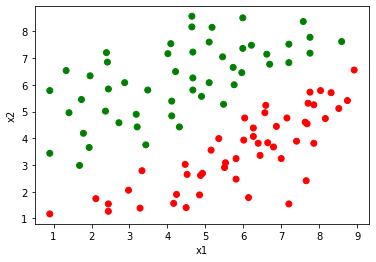

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/data1.csv")

y  = np.array(df["y"])
colour = {}
colour[1]="r"
colour[0]="g"
colours = []
for i in y:
    colours.append(colour[i])
plt.scatter(np.array(df["x1"]),np.array(df["x2"]),c= colours)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

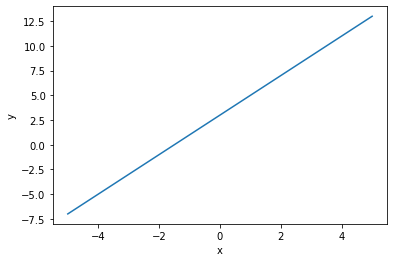

In [ ]:
x = np.linspace(-5,5,100)
y = 2*x+3
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
def sigmoid(z):
    if z.all() < 0 :
        return np.exp(z)/(1 + np.exp(z))
    else:
        return 1 / (1 + np.exp(-z))

V = np.random.randint(-1000,1000,(10))
v = []
for x in V:
    v.append(sigmoid(x))
print(v)
print(V)

[1.0, 1.8122540257939925e-230, 1.0, 1.0, 2.842363700655332e-172, 1.0, 0.0, 1.0, 0.0, 1.1426473231677557e-245]
[ 260 -529  611  635 -395  497 -796  455 -981 -564]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


In [ ]:
def hypothesis(theta, X):
    if sigmoid(np.dot(theta, X)) >= 0.5:
        print(0)
    else:
        print(1)

In [ ]:
def cost(theta, X, y):
    return(-y * np.log(hypothesis(theta, X)) - (1-y) * np.log(1-hypothesis(theta, X))).mean()

## Part B

In [3]:
import pandas as pd
df = pd.read_csv('/content/loan_data.csv')
df.info()

df = df.drop(columns=['Loan_ID'])
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

df_encoded = pd.get_dummies(df, drop_first = True)
df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [4]:
x = df_encoded.drop(columns = 'Loan_Status_Y')
y = df_encoded['Loan_Status_Y']

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, stratify=y, random_state=0)
x_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
530,1025,5500.0,216.0,360.0,NaN,1,1,0,0,0,0,0,0,0
522,5677,1424.0,100.0,360.0,1.0,1,1,0,0,1,0,1,0,0
454,7085,0.0,84.0,360.0,1.0,1,0,0,0,0,0,1,1,0
498,2895,0.0,95.0,360.0,1.0,1,1,1,0,0,0,1,1,0
573,6125,1625.0,187.0,480.0,1.0,1,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,7667,0.0,185.0,360.0,NaN,1,1,0,1,0,1,0,0,0
564,8799,0.0,258.0,360.0,0.0,1,1,0,1,0,0,0,0,1
73,4755,0.0,95.0,NaN,0.0,1,1,0,0,1,1,0,1,0
235,5500,1260.0,170.0,360.0,1.0,1,1,1,0,0,0,0,0,0


In [10]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

sim = SimpleImputer(strategy='mean')
sim_train = sim.fit(x_train)
x_train = sim_train.transform(x_train)
x_test = sim_train.transform(x_test)


st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.fit_transform(x_test)

In [11]:
def sigmoidf(x):
    return 1 / (1 + np.exp(-x))

In [14]:
def comput_cost(x, y, theta):
    m = len(y)
    predictions = sigmoidf(np.dot(x,theta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * np.sum(error)
    
    grad = 1/m * np.dot(x.transpose(),(predictions - y))
    return (cost , grad)

In [15]:
def gradient_descent(x, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        cost, grad = comput_cost(x,y,params)
        params = params - (learning_rate * grad)
        cost_history.append(cost)
    return (params,cost_history)

In [16]:
y_train = y_train.values.reshape(-1,1)

Initial Cost:  -121.09747107049424
Optimal parameters:  [[ 0.42241193]
 [ 0.42241193]
 [-0.04960409]
 [-0.10943809]
 [-0.07231011]
 [-0.05221414]
 [ 1.31570229]
 [ 0.0094006 ]
 [ 0.24229799]
 [-0.1428512 ]
 [ 0.07091013]
 [-0.00658586]
 [-0.1433506 ]
 [-0.04561131]
 [ 0.3894899 ]
 [ 0.07700609]]


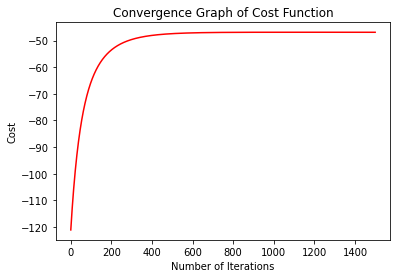

In [19]:
import numpy as np
import matplotlib.pyplot as plt

m , n = x_train.shape[0], x_train.shape[1]
x_train =  np.append(np.ones((m,1)),x_train,axis=1)
x_test =  np.append(np.ones((x_test.shape[0],1)),x_test,axis=1)
n = np.size(x_train, 1)
params = np.zeros((n,1))




iterations = 1500
learning_rate = 0.03
(initial_cost,grad) = comput_cost(x_train, y_train, params)
print("Initial Cost: ", initial_cost)

( params_optimal, cost_history) = gradient_descent(x_train, y_train, params, learning_rate, iterations)
print("Optimal parameters: ", params_optimal)

plt.figure()
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [20]:
y_predi = x_test.dot(params_optimal) > 0.5
y_pred2=[]
for x in range(len(y_predi)):
    y_pred2.append(int(y_predi[x][0]))
print(y_pred2)

[1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1]


In [22]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(x_train, y_train)
y_pred=clf.predict(x_test)
prob =clf.predict_proba(x_test)

print(clf.score(x_test, y_test))
y_pred = y_pred.reshape(-1,1)

0.8048780487804879


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Part C

In [23]:
from sklearn.metrics import confusion_matrix 

c = confusion_matrix(y_test, y_pred)
print(c)

[[16 22]
 [ 2 83]]


In [24]:
print("Accuracy score: ")
print((c[0][0]+c[1][1])/np.sum(c))

Accuracy score: 
0.8048780487804879


In [25]:
from sklearn.metrics import classification_report

names=["Vaild Loan","Invalid"]
print(classification_report(y_test,y_pred,target_names=names))

              precision    recall  f1-score   support

  Vaild Loan       0.89      0.42      0.57        38
     Invalid       0.79      0.98      0.87        85

    accuracy                           0.80       123
   macro avg       0.84      0.70      0.72       123
weighted avg       0.82      0.80      0.78       123



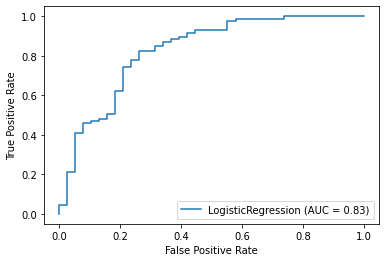

In [27]:
from sklearn import metrics

metrics.plot_roc_curve(clf, x_test, y_test)

In [28]:
c1 = confusion_matrix(y_test, y_pred2)
print(c1)

print("Accuracy of implementation: ")
print((c1[0][0]+c1[1][1])/np.sum(c1))

print("Accuracyof sklearn model: ")
print((c[0][0]+c[1][1])/np.sum(c))

[[17 21]
 [ 4 81]]
Accuracy of implementation: 
0.7967479674796748
Accuracyof sklearn model: 
0.8048780487804879
